In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math 
from matplotlib.figure import Figure
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

!pip install category_encoders

In [2]:
import category_encoders as ce

In [3]:
transpose=pd.read_excel('transpose.xlsx')

In [4]:
transpose

,Week 1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Week 2,Unnamed: 5,Unnamed: 6,Unnamed: 7,Week 3,Unnamed: 9,...,Unnamed: 266,Unnamed: 267,Week 17.1,Unnamed: 269,Unnamed: 270,Unnamed: 271,Week 18.1,Unnamed: 273,Unnamed: 274,Unnamed: 275
0,Output,Total Hrs,Wks Load,Week 1,Output,Total Hrs,Wks Load,Week 1,Output,Total Hrs,...,Wks Load,Week 1,Output,Total Hrs,Wks Load,Week 1,Output,Total Hrs,Wks Load,Week 1
1,113,600,5.309735,112,113,613,5.424779,193,100,686,...,3.098583,142.532,72,212.71,2.954306,134.236,71,224.464,3.161465,118.185
2,418,1880,4.497608,561,418,1831,4.380383,637,415,1875,...,3.021027,852.97,514,1877.82,3.653346,1075.773,484,1859.677,3.842308,915.597
3,248,1257,5.068548,384,248,1302,5.25,434,228,1361,...,3.111677,342.641,362,1229.508,3.396431,352.771,348,1385.349,3.980888,357.989
4,154,1152,7.480519,275,148,1185,8.006757,316,165,1377,...,3.400683,253.545,224,793.484,3.542339,224.769,215,821.851,3.822563,271.371
5,153,364,2.379085,115,153,430,2.810458,128,137,581,...,3.497935,203.628,184,678.614,3.68812,185.616,186,720.645,3.874435,262.227
6,60,209,3.483333,96,60,233,3.883333,94,62,218,...,1.746054,26.196,112,188.288,1.681143,79.361,102,164.717,1.614873,50.475
7,37,129,3.486486,2,37,106,2.864865,3,41,120,...,20.0505,13.54,2,38.344,19.172,1.915,2,39.833,19.9165,3.715
8,96,452,4.708333,192,96,514,5.354167,204,94,529,...,1.264667,95.571,132,187.827,1.422932,95.571,27,193.294,7.159037,90.476
9,281,926,3.295374,328,281,936,3.330961,425,261,890,...,2.384059,383.531,341,927.409,2.719674,359.807,326,1018.063,3.122893,346.292


In [5]:
check=transpose.T

In [6]:
check

,0,1,2,3,4,5,6,7,8,9,10,11,12
Week 1,Output,113,418,248,154,153,60,37,96,281,0,446,2006
Unnamed: 1,Total Hrs,600,1880,1257,1152,364,209,129,452,926,0,2938,9907
Unnamed: 2,Wks Load,5.309735,4.497608,5.068548,7.480519,2.379085,3.483333,3.486486,4.708333,3.295374,-,6.587444,4.938684
Unnamed: 3,Week 1,112,561,384,275,115,96,2,192,328,0,1341,3406
Week 2,Output,113,418,248,148,153,60,37,96,281,0,444,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unnamed: 271,Week 1,134.236,1075.773,352.771,224.769,185.616,79.361,1.915,95.571,359.807,NaN,222.411,2732.23
Week 18.1,Output,71,484,348,215,186,102,2,27,326,NaN,115,1876
Unnamed: 273,Total Hrs,224.464,1859.677,1385.349,821.851,720.645,164.717,39.833,193.294,1018.063,NaN,619.42,7047.313
Unnamed: 274,Wks Load,3.161465,3.842308,3.980888,3.822563,3.874435,1.614873,19.9165,7.159037,3.122893,NaN,5.386261,3.756563


In [7]:
check.to_excel('check.xls')

C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_3672/3269339652.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  check.to_excel('check.xls')


In [8]:
loop21=pd.read_excel('load_history.xls', sheet_name= 'Sheet1')

In [9]:
loop21

,Year,Week,Title,Value
0,21,1,Output,2006.000000
1,21,1,Total Hrs,9907.000000
2,21,1,Wks Load,4.938684
3,21,1,Week 1,3406.000000
4,21,2,Output,1998.000000
...,...,...,...,...
199,21,50,Week 1,2893.000000
200,21,51,Output,1980.000000
201,21,51,Total Hrs,7048.000000
202,21,51,Wks Load,3.559596


In [10]:
output_21=loop21.iloc[::4, :]
output_21['created_yr']=output_21['Year']
output_21['created_wk']=output_21['Week']
output_21

C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_3672/3921137354.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_21['created_yr']=output_21['Year']
C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_3672/3921137354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_21['created_wk']=output_21['Week']


,Year,Week,Title,Value,created_yr,created_wk
0,21,1,Output,2006.0,21,1
4,21,2,Output,1998.0,21,2
8,21,3,Output,1952.0,21,3
12,21,4,Output,2139.0,21,4
16,21,5,Output,2155.0,21,5
20,21,6,Output,2098.0,21,6
24,21,7,Output,2105.0,21,7
28,21,8,Output,2200.0,21,8
32,21,9,Output,2199.0,21,9
36,21,10,Output,2192.0,21,10


In [11]:
total_hrs21=loop21.iloc[1::4, :]
total_hrs21['created_yr']=total_hrs21['Year']
total_hrs21['created_wk']=total_hrs21['Week']
total_hrs21

C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_3672/640738667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_hrs21['created_yr']=total_hrs21['Year']
C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_3672/640738667.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_hrs21['created_wk']=total_hrs21['Week']


,Year,Week,Title,Value,created_yr,created_wk
1,21,1,Total Hrs,9907.0,21,1
5,21,2,Total Hrs,10032.0,21,2
9,21,3,Total Hrs,10406.0,21,3
13,21,4,Total Hrs,10602.0,21,4
17,21,5,Total Hrs,10671.0,21,5
21,21,6,Total Hrs,10621.0,21,6
25,21,7,Total Hrs,9535.0,21,7
29,21,8,Total Hrs,9853.0,21,8
33,21,9,Total Hrs,10293.0,21,9
37,21,10,Total Hrs,10184.0,21,10


In [12]:
wks_load21=loop21.iloc[2::4, :]
wks_load21['created_yr']=wks_load21['Year'].astype(str)
wks_load21['created_wk']=wks_load21['Week'].astype(str)
wks_load21

C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_3672/2981666504.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wks_load21['created_yr']=wks_load21['Year'].astype(str)
C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_3672/2981666504.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wks_load21['created_wk']=wks_load21['Week'].astype(str)


,Year,Week,Title,Value,created_yr,created_wk
2,21,1,Wks Load,4.938684,21,1
6,21,2,Wks Load,5.021021,21,2
10,21,3,Wks Load,5.330943,21,3
14,21,4,Wks Load,4.956522,21,4
18,21,5,Wks Load,4.951740,21,5
22,21,6,Wks Load,5.062440,21,6
26,21,7,Wks Load,4.529691,21,7
30,21,8,Wks Load,4.478636,21,8
34,21,9,Wks Load,4.680764,21,9
38,21,10,Wks Load,4.645985,21,10


In [13]:
week_one21=loop21.iloc[3::4, :]
week_one21['created_yr']=week_one21['Year']
week_one21['created_wk']=week_one21['Week']
week_one21

C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_3672/1756724557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_one21['created_yr']=week_one21['Year']
C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_3672/1756724557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_one21['created_wk']=week_one21['Week']


,Year,Week,Title,Value,created_yr,created_wk
3,21,1,Week 1,3406.0,21,1
7,21,2,Week 1,3865.0,21,2
11,21,3,Week 1,3879.0,21,3
15,21,4,Week 1,3764.0,21,4
19,21,5,Week 1,3498.0,21,5
23,21,6,Week 1,3509.0,21,6
27,21,7,Week 1,3022.0,21,7
31,21,8,Week 1,2966.0,21,8
35,21,9,Week 1,3327.0,21,9
39,21,10,Week 1,3681.0,21,10


In [14]:
loop22=pd.read_excel('load_history.xls', sheet_name= 'Sheet2')

In [15]:
loop22

,Year,Week,Title,Value
0,22,1,Output,1879.000000
1,22,1,Total Hrs,7514.000000
2,22,1,Wks Load,3.998936
3,22,1,Week 1,3416.000000
4,22,2,Output,1879.000000
...,...,...,...,...
67,22,17,Week 1,2732.230000
68,22,18,Output,1876.000000
69,22,18,Total Hrs,7047.313000
70,22,18,Wks Load,3.756563


In [16]:
output_22=loop22.iloc[::4, :]
output_22['created_yr']=output_22['Year'].astype(str)
output_22['created_wk']=output_22['Week'].astype(str)
output_22


C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_3672/4028169709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_22['created_yr']=output_22['Year'].astype(str)
C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_3672/4028169709.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_22['created_wk']=output_22['Week'].astype(str)


,Year,Week,Title,Value,created_yr,created_wk
0,22,1,Output,1879.0,22,1
4,22,2,Output,1879.0,22,2
8,22,3,Output,1903.0,22,3
12,22,4,Output,1882.0,22,4
16,22,5,Output,1772.0,22,5
20,22,6,Output,1714.0,22,6
24,22,7,Output,1794.0,22,7
28,22,8,Output,1853.0,22,8
32,22,9,Output,1809.0,22,9
36,22,10,Output,1798.0,22,10


In [17]:
total_hrs22=loop22.iloc[1::4, :]
total_hrs22['created_yr']=total_hrs22['Year'].astype(str)
total_hrs22['created_wk']=total_hrs22['Week'].astype(str)
total_hrs22

C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_3672/4059180549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_hrs22['created_yr']=total_hrs22['Year'].astype(str)
C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_3672/4059180549.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_hrs22['created_wk']=total_hrs22['Week'].astype(str)


,Year,Week,Title,Value,created_yr,created_wk
1,22,1,Total Hrs,7514.000,22,1
5,22,2,Total Hrs,7405.000,22,2
9,22,3,Total Hrs,7653.000,22,3
13,22,4,Total Hrs,7877.000,22,4
17,22,5,Total Hrs,7874.000,22,5
21,22,6,Total Hrs,7567.803,22,6
25,22,7,Total Hrs,7467.285,22,7
29,22,8,Total Hrs,7330.995,22,8
33,22,9,Total Hrs,7071.089,22,9
37,22,10,Total Hrs,7295.650,22,10


In [18]:
wks_load22=loop22.iloc[2::4, :]
wks_load22['created_yr']=wks_load22['Year'].astype(str)
wks_load22['created_wk']=wks_load22['Week'].astype(str)
wks_load22

C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_3672/404893038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wks_load22['created_yr']=wks_load22['Year'].astype(str)
C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_3672/404893038.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wks_load22['created_wk']=wks_load22['Week'].astype(str)


,Year,Week,Title,Value,created_yr,created_wk
2,22,1,Wks Load,3.998936,22,1
6,22,2,Wks Load,3.940926,22,2
10,22,3,Wks Load,4.021545,22,3
14,22,4,Wks Load,4.185441,22,4
18,22,5,Wks Load,4.443567,22,5
22,22,6,Wks Load,4.415288,22,6
26,22,7,Wks Load,4.162366,22,7
30,22,8,Wks Load,3.956284,22,8
34,22,9,Wks Load,3.908839,22,9
38,22,10,Wks Load,4.057647,22,10


In [19]:
week_one22=loop22.iloc[3::4, :]
week_one22['created_yr']=week_one22['Year'].astype(str)
week_one22['created_wk']=week_one22['Week'].astype(str)
week_one22

C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_3672/4181413993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_one22['created_yr']=week_one22['Year'].astype(str)
C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_3672/4181413993.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  week_one22['created_wk']=week_one22['Week'].astype(str)


,Year,Week,Title,Value,created_yr,created_wk
3,22,1,Week 1,3416.000,22,1
7,22,2,Week 1,3205.000,22,2
11,22,3,Week 1,3817.000,22,3
15,22,4,Week 1,3829.000,22,4
19,22,5,Week 1,3945.000,22,5
23,22,6,Week 1,3394.959,22,6
27,22,7,Week 1,3354.812,22,7
31,22,8,Week 1,3296.079,22,8
35,22,9,Week 1,3275.335,22,9
39,22,10,Week 1,3313.141,22,10


In [20]:
wks_load21['wks_load']=wks_load21['Value']
wks_load22['wks_load']=wks_load22['Value']
frames = [wks_load21, wks_load22]
wks_load= pd.concat(frames)


week_one21['single_week']=week_one21['Value']
week_one22['single_week']=week_one22['Value']
frames = [week_one21, week_one22]
wk_one= pd.concat(frames)


output_21['avg_output']=output_21['Value']
output_22['avg_output']=output_22['Value']
frames = [output_21, output_22]
output= pd.concat(frames)

total_hrs21['Total Hrs']=total_hrs21['Value']
total_hrs22['Total Hrs']=total_hrs22['Value']
frames = [total_hrs21, total_hrs22]
total_hrs= pd.concat(frames)

wks_load
wk_one
output
total_hrs


C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_3672/3680864695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wks_load21['wks_load']=wks_load21['Value']
C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_3672/3680864695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wks_load22['wks_load']=wks_load22['Value']
C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_3672/3680864695.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

,Year,Week,Title,Value,created_yr,created_wk,Total Hrs
1,21,1,Total Hrs,9907.000,21,1,9907.000
5,21,2,Total Hrs,10032.000,21,2,10032.000
9,21,3,Total Hrs,10406.000,21,3,10406.000
13,21,4,Total Hrs,10602.000,21,4,10602.000
17,21,5,Total Hrs,10671.000,21,5,10671.000
...,...,...,...,...,...,...,...
53,22,14,Total Hrs,6365.243,22,14,6365.243
57,22,15,Total Hrs,6228.258,22,15,6228.258
61,22,16,Total Hrs,6037.460,22,16,6037.460
65,22,17,Total Hrs,6708.414,22,17,6708.414


In [21]:
output

,Year,Week,Title,Value,created_yr,created_wk,avg_output
0,21,1,Output,2006.0,21,1,2006.0
4,21,2,Output,1998.0,21,2,1998.0
8,21,3,Output,1952.0,21,3,1952.0
12,21,4,Output,2139.0,21,4,2139.0
16,21,5,Output,2155.0,21,5,2155.0
...,...,...,...,...,...,...,...
52,22,14,Output,1883.0,22,14,1883.0
56,22,15,Output,1964.0,22,15,1964.0
60,22,16,Output,2051.0,22,16,2051.0
64,22,17,Output,2051.0,22,17,2051.0


In [22]:
wk_one

,Year,Week,Title,Value,created_yr,created_wk,single_week
3,21,1,Week 1,3406.000,21,1,3406.000
7,21,2,Week 1,3865.000,21,2,3865.000
11,21,3,Week 1,3879.000,21,3,3879.000
15,21,4,Week 1,3764.000,21,4,3764.000
19,21,5,Week 1,3498.000,21,5,3498.000
...,...,...,...,...,...,...,...
55,22,14,Week 1,2606.766,22,14,2606.766
59,22,15,Week 1,2594.637,22,15,2594.637
63,22,16,Week 1,2528.574,22,16,2528.574
67,22,17,Week 1,2732.230,22,17,2732.230


In [23]:
wks_load.dtypes

Year            int64
Week            int64
Title          object
Value         float64
created_yr     object
created_wk     object
wks_load      float64
dtype: object

In [24]:
wks_load.to_excel('wks_load.xls')
wk_one.to_excel('wk_one.xls')
output.to_excel('output.xls')
total_hrs.to_excel('total_hrs.xls')

C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_3672/2112820525.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  wks_load.to_excel('wks_load.xls')
C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_3672/2112820525.py:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a wa

In [25]:
to_merge=pd.read_excel('load_to_merge.xls')

In [26]:
to_merge['created_yr']=to_merge['created_yr'].astype(str)
to_merge['created_wk']=to_merge['created_wk'].astype(str)

In [27]:
to_merge

,created_yr,created_wk,Total Hrs,single_week,avg_output,wks_load
0,21,1,9907.000,3406.000,2006,4.938684
1,21,2,10032.000,3865.000,1998,5.021021
2,21,3,10406.000,3879.000,1952,5.330943
3,21,4,10602.000,3764.000,2139,4.956522
4,21,5,10671.000,3498.000,2155,4.951740
...,...,...,...,...,...,...
64,22,14,6365.243,2606.766,1883,3.380373
65,22,15,6228.258,2594.637,1964,3.171211
66,22,16,6037.460,2528.574,2051,2.943667
67,22,17,6708.414,2732.230,2051,3.270802


In [28]:
D49=pd.read_excel('WO_History_-_D49.xls', skiprows=1)

In [29]:
D49

,DEPT,B/P,CREATED,DUE DT,DT COMPLETED,WO NBR,PART NUMBER,ORIG QTY,QTY TO STOCK,QTY SCRAP,WOTYPE,CREATED BY,STS,PRIMARY WC,ITEM DESC,SCH DT CHG CNT
0,D49,X67,2021-01-05,2020-12-22,2021-01-13,5150820,BG-17E10-40EN,27,22,4,N,B125342,75,X5167,RCPT SHELL,0
1,D49,X66,2021-01-05,2021-04-28,2021-03-05,5150870,BG-19E10-10EN,50,30,10,N,B125342,75,X5163,RCPT SHELL -N,0
2,D49,X20,2021-01-05,2021-02-17,2021-02-19,5151400,BT192220EN-Y240,50,44,6,N,B125342,70,X5185,RCPT SHELL,1
3,D49,X66,2021-01-05,2021-07-31,2021-01-21,5151360,F2-660320-013,80,23,64,N,B125342,70,X5184,"SHELL, PLUG -ZINC NI -N",1
4,D49,F45,2021-01-05,2021-01-15,2021-01-12,5151430,M10-660174-13B,250,252,1,N,B125342,70,F5184,"NUT, HEX",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7303,D49,P56,2022-04-28,2022-05-31,NaT,3077420,10-553318-25G,65,0,0,N,B125342,0,P5128,PROT CAP,0
7304,D49,X20,2022-04-28,2022-10-31,NaT,3076580,10-706969-008,30,0,0,N,B125342,0,X5120,"SLEEVE, PLUG -AJ4R",1
7305,D49,XRS,2022-04-28,2022-05-17,NaT,3076540,21-091912-001,109,0,0,N,B125342,10,F5173,INSERT,0
7306,D49,F46,2022-04-28,2021-11-11,NaT,3078910,21-120429-239,10,0,0,R,NAX38691,10,F5189,"SHELL, RCPT -CAD OD/NI -A",2


In [30]:
# get week column as created_wk and created_yr

In [31]:
D49['created_yr']=D49['CREATED'].dt.strftime('%y')
D49['created_wk']=D49['CREATED'].dt.week.astype(str)

C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_3672/4202057922.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  D49['created_wk']=D49['CREATED'].dt.week.astype(str)


In [32]:
D49.dtypes

DEPT                      object
B/P                       object
CREATED           datetime64[ns]
DUE DT            datetime64[ns]
DT COMPLETED      datetime64[ns]
WO NBR                    object
PART NUMBER               object
ORIG QTY                   int64
QTY TO STOCK               int64
QTY SCRAP                  int64
WOTYPE                    object
CREATED BY                object
STS                        int64
PRIMARY WC                object
ITEM DESC                 object
SCH DT CHG CNT             int64
created_yr                object
created_wk                object
dtype: object

### Need to get first ring date merged on this df and then put week and year to merge

### Need to get the critical qty of the order to assist with y/n criteria

### Need to define a YES/NO criteria based on percent to stock by certain date, etc

In [33]:
D49['Days Late']=D49['DT COMPLETED']-D49['DUE DT']
D49['Days Late Int']=D49['Days Late'].dt.days
D49['Possible_time']=D49['DUE DT']-D49['CREATED']
D49['Possible_time']=D49['Possible_time'].dt.days

In [34]:
D49

,DEPT,B/P,CREATED,DUE DT,DT COMPLETED,WO NBR,PART NUMBER,ORIG QTY,QTY TO STOCK,QTY SCRAP,...,CREATED BY,STS,PRIMARY WC,ITEM DESC,SCH DT CHG CNT,created_yr,created_wk,Days Late,Days Late Int,Possible_time
0,D49,X67,2021-01-05,2020-12-22,2021-01-13,5150820,BG-17E10-40EN,27,22,4,...,B125342,75,X5167,RCPT SHELL,0,21,1,22 days,22.0,-14
1,D49,X66,2021-01-05,2021-04-28,2021-03-05,5150870,BG-19E10-10EN,50,30,10,...,B125342,75,X5163,RCPT SHELL -N,0,21,1,-54 days,-54.0,113
2,D49,X20,2021-01-05,2021-02-17,2021-02-19,5151400,BT192220EN-Y240,50,44,6,...,B125342,70,X5185,RCPT SHELL,1,21,1,2 days,2.0,43
3,D49,X66,2021-01-05,2021-07-31,2021-01-21,5151360,F2-660320-013,80,23,64,...,B125342,70,X5184,"SHELL, PLUG -ZINC NI -N",1,21,1,-191 days,-191.0,207
4,D49,F45,2021-01-05,2021-01-15,2021-01-12,5151430,M10-660174-13B,250,252,1,...,B125342,70,F5184,"NUT, HEX",0,21,1,-3 days,-3.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7303,D49,P56,2022-04-28,2022-05-31,NaT,3077420,10-553318-25G,65,0,0,...,B125342,0,P5128,PROT CAP,0,22,17,NaT,NaN,33
7304,D49,X20,2022-04-28,2022-10-31,NaT,3076580,10-706969-008,30,0,0,...,B125342,0,X5120,"SLEEVE, PLUG -AJ4R",1,22,17,NaT,NaN,186
7305,D49,XRS,2022-04-28,2022-05-17,NaT,3076540,21-091912-001,109,0,0,...,B125342,10,F5173,INSERT,0,22,17,NaT,NaN,19
7306,D49,F46,2022-04-28,2021-11-11,NaT,3078910,21-120429-239,10,0,0,...,NAX38691,10,F5189,"SHELL, RCPT -CAD OD/NI -A",2,22,17,NaT,NaN,-168


In [35]:
D49.dtypes

DEPT                       object
B/P                        object
CREATED            datetime64[ns]
DUE DT             datetime64[ns]
DT COMPLETED       datetime64[ns]
WO NBR                     object
PART NUMBER                object
ORIG QTY                    int64
QTY TO STOCK                int64
QTY SCRAP                   int64
WOTYPE                     object
CREATED BY                 object
STS                         int64
PRIMARY WC                 object
ITEM DESC                  object
SCH DT CHG CNT              int64
created_yr                 object
created_wk                 object
Days Late         timedelta64[ns]
Days Late Int             float64
Possible_time               int64
dtype: object

In [36]:
wks_load21.dtypes

Year            int64
Week            int64
Title          object
Value         float64
created_yr     object
created_wk     object
wks_load      float64
dtype: object

In [37]:
new_df1 = pd.merge(D49, to_merge,  how='outer', on=['created_yr','created_wk'])


In [38]:
new_df1

,DEPT,B/P,CREATED,DUE DT,DT COMPLETED,WO NBR,PART NUMBER,ORIG QTY,QTY TO STOCK,QTY SCRAP,...,SCH DT CHG CNT,created_yr,created_wk,Days Late,Days Late Int,Possible_time,Total Hrs,single_week,avg_output,wks_load
0,D49,X67,2021-01-05,2020-12-22,2021-01-13,5150820,BG-17E10-40EN,27.0,22.0,4.0,...,0.0,21,1,22 days,22.0,-14.0,9907.000,3406.000,2006.0,4.938684
1,D49,X66,2021-01-05,2021-04-28,2021-03-05,5150870,BG-19E10-10EN,50.0,30.0,10.0,...,0.0,21,1,-54 days,-54.0,113.0,9907.000,3406.000,2006.0,4.938684
2,D49,X20,2021-01-05,2021-02-17,2021-02-19,5151400,BT192220EN-Y240,50.0,44.0,6.0,...,1.0,21,1,2 days,2.0,43.0,9907.000,3406.000,2006.0,4.938684
3,D49,X66,2021-01-05,2021-07-31,2021-01-21,5151360,F2-660320-013,80.0,23.0,64.0,...,1.0,21,1,-191 days,-191.0,207.0,9907.000,3406.000,2006.0,4.938684
4,D49,F45,2021-01-05,2021-01-15,2021-01-12,5151430,M10-660174-13B,250.0,252.0,1.0,...,0.0,21,1,-3 days,-3.0,10.0,9907.000,3406.000,2006.0,4.938684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7304,D49,X20,2022-04-28,2022-10-31,NaT,3076580,10-706969-008,30.0,0.0,0.0,...,1.0,22,17,NaT,NaN,186.0,6708.414,2732.230,2051.0,3.270802
7305,D49,XRS,2022-04-28,2022-05-17,NaT,3076540,21-091912-001,109.0,0.0,0.0,...,0.0,22,17,NaT,NaN,19.0,6708.414,2732.230,2051.0,3.270802
7306,D49,F46,2022-04-28,2021-11-11,NaT,3078910,21-120429-239,10.0,0.0,0.0,...,2.0,22,17,NaT,NaN,-168.0,6708.414,2732.230,2051.0,3.270802
7307,D49,X20,2022-04-29,2022-10-31,NaT,3088270,BT-19E12-20EN,15.0,0.0,0.0,...,1.0,22,17,NaT,NaN,185.0,6708.414,2732.230,2051.0,3.270802


In [39]:
new_df1= new_df1[new_df1['Days Late Int'].notna()]

In [40]:
new_df1

,DEPT,B/P,CREATED,DUE DT,DT COMPLETED,WO NBR,PART NUMBER,ORIG QTY,QTY TO STOCK,QTY SCRAP,...,SCH DT CHG CNT,created_yr,created_wk,Days Late,Days Late Int,Possible_time,Total Hrs,single_week,avg_output,wks_load
0,D49,X67,2021-01-05,2020-12-22,2021-01-13,5150820,BG-17E10-40EN,27.0,22.0,4.0,...,0.0,21,1,22 days,22.0,-14.0,9907.000,3406.000,2006.0,4.938684
1,D49,X66,2021-01-05,2021-04-28,2021-03-05,5150870,BG-19E10-10EN,50.0,30.0,10.0,...,0.0,21,1,-54 days,-54.0,113.0,9907.000,3406.000,2006.0,4.938684
2,D49,X20,2021-01-05,2021-02-17,2021-02-19,5151400,BT192220EN-Y240,50.0,44.0,6.0,...,1.0,21,1,2 days,2.0,43.0,9907.000,3406.000,2006.0,4.938684
3,D49,X66,2021-01-05,2021-07-31,2021-01-21,5151360,F2-660320-013,80.0,23.0,64.0,...,1.0,21,1,-191 days,-191.0,207.0,9907.000,3406.000,2006.0,4.938684
4,D49,F45,2021-01-05,2021-01-15,2021-01-12,5151430,M10-660174-13B,250.0,252.0,1.0,...,0.0,21,1,-3 days,-3.0,10.0,9907.000,3406.000,2006.0,4.938684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7142,D49,F45,2022-04-18,2022-04-27,2022-04-26,2984060,21-091071-024,100.0,100.0,0.0,...,0.0,22,16,-1 days,-1.0,9.0,6037.460,2528.574,2051.0,2.943667
7173,D49,F46,2022-04-20,2022-04-25,2022-04-28,3003320,21-113597-024,30.0,30.0,1.0,...,0.0,22,16,3 days,3.0,5.0,6037.460,2528.574,2051.0,2.943667
7174,D49,P56,2022-04-20,2021-11-04,2022-04-29,3003030,21-121263-001,150.0,150.0,0.0,...,0.0,22,16,176 days,176.0,-167.0,6037.460,2528.574,2051.0,2.943667
7239,D49,P57,2022-04-26,2022-04-26,2022-04-26,3049320,SF7-777880-011,23.0,0.0,0.0,...,0.0,22,17,0 days,0.0,0.0,6708.414,2732.230,2051.0,3.270802


In [41]:
new_df1['B/P'].unique()

array(['X67', 'X66', 'X20', 'F45', 'F46', 'P55', 'P59', 'P57', 'P56',
       'XRS', '546', 'X65', '544', 'P58', '549', '545', '548', 'FMA',
       'XPS', 'XOS', 'P52', 'M23', 'P85', 'P81', 'L41', 'X31'],
      dtype=object)

In [42]:
new_df1['PRIMARY WC'].unique()

array(['X5167', 'X5163', 'X5185', 'X5184', 'F5184', 'X5123', 'F5176',
       'F5173', 'P5155', 'G3015', 'P5116', 'P5128', 'X5182', 'X5160',
       'G3041', 'X5186', 'X5120', 'X5162', 'F5157', 'G3017', 'P5207',
       'F5172', 'G3002', 'G3010', 'P5115', 'F5171', 'S2803', 'P5117',
       'S2808', nan, 'P5321', 'F5159', 'G3026', 'II660', 'P5159', 'II281',
       'F5189', 'X5180'], dtype=object)

## Providing a baseline ML model now

In [43]:
conditions = [
    (new_df1['Days Late Int'] < 0),
    (new_df1['Days Late Int'] >= 0)]

values = [0, 1]

new_df1['Late'] = np.select(conditions, values)

C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_3672/3189421772.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1['Late'] = np.select(conditions, values)


In [44]:
new_df1

,DEPT,B/P,CREATED,DUE DT,DT COMPLETED,WO NBR,PART NUMBER,ORIG QTY,QTY TO STOCK,QTY SCRAP,...,created_yr,created_wk,Days Late,Days Late Int,Possible_time,Total Hrs,single_week,avg_output,wks_load,Late
0,D49,X67,2021-01-05,2020-12-22,2021-01-13,5150820,BG-17E10-40EN,27.0,22.0,4.0,...,21,1,22 days,22.0,-14.0,9907.000,3406.000,2006.0,4.938684,1
1,D49,X66,2021-01-05,2021-04-28,2021-03-05,5150870,BG-19E10-10EN,50.0,30.0,10.0,...,21,1,-54 days,-54.0,113.0,9907.000,3406.000,2006.0,4.938684,0
2,D49,X20,2021-01-05,2021-02-17,2021-02-19,5151400,BT192220EN-Y240,50.0,44.0,6.0,...,21,1,2 days,2.0,43.0,9907.000,3406.000,2006.0,4.938684,1
3,D49,X66,2021-01-05,2021-07-31,2021-01-21,5151360,F2-660320-013,80.0,23.0,64.0,...,21,1,-191 days,-191.0,207.0,9907.000,3406.000,2006.0,4.938684,0
4,D49,F45,2021-01-05,2021-01-15,2021-01-12,5151430,M10-660174-13B,250.0,252.0,1.0,...,21,1,-3 days,-3.0,10.0,9907.000,3406.000,2006.0,4.938684,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7142,D49,F45,2022-04-18,2022-04-27,2022-04-26,2984060,21-091071-024,100.0,100.0,0.0,...,22,16,-1 days,-1.0,9.0,6037.460,2528.574,2051.0,2.943667,0
7173,D49,F46,2022-04-20,2022-04-25,2022-04-28,3003320,21-113597-024,30.0,30.0,1.0,...,22,16,3 days,3.0,5.0,6037.460,2528.574,2051.0,2.943667,1
7174,D49,P56,2022-04-20,2021-11-04,2022-04-29,3003030,21-121263-001,150.0,150.0,0.0,...,22,16,176 days,176.0,-167.0,6037.460,2528.574,2051.0,2.943667,1
7239,D49,P57,2022-04-26,2022-04-26,2022-04-26,3049320,SF7-777880-011,23.0,0.0,0.0,...,22,17,0 days,0.0,0.0,6708.414,2732.230,2051.0,3.270802,1


## Merge manufacturing code

### upload_4_29 is the most up to date manu code list

In [45]:
manu_codes=pd.read_excel('upload_4_29.xls')

In [46]:
manu_codes

,CO,PART NUMBER,PART TYPE,PART SUB TYPE,PART SIZE,PART FAMILY SERIES,PART FRONT FEATURES,PART BACK FEATURES,RAW MATERIAL TYPE,RAW MATERIAL SHAPE,RAW SIZE,SECOND RAW MAT DIM
0,100,AN960JD1816L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,100,AN960JD2616L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,100,AR-109161-03B,S,Z,ZZ,Y,NaN,NaN,A,Z,0.0,0.0
3,100,AR-139131-004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,100,AR-140000-008,H,Z,ZZ,Y,NaN,NaN,A,H,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34795,100,10-667428-40B,S,B,40,G,NaN,NaN,A,C,0.0,0.0
34796,100,10-564863-36B,S,Z,36,Z,NaN,NaN,A,U,0.0,0.0
34797,100,SF-114564-179,S,Z,17,Y,NaN,NaN,A,F,0.0,0.0
34798,100,47-098485-007,S,B,ZZ,Y,NaN,NaN,B,C,0.0,0.0


In [47]:
new_df2 = pd.merge(new_df1, manu_codes, how="left", on="PART NUMBER")

In [48]:
new_df2

,DEPT,B/P,CREATED,DUE DT,DT COMPLETED,WO NBR,PART NUMBER,ORIG QTY,QTY TO STOCK,QTY SCRAP,...,PART TYPE,PART SUB TYPE,PART SIZE,PART FAMILY SERIES,PART FRONT FEATURES,PART BACK FEATURES,RAW MATERIAL TYPE,RAW MATERIAL SHAPE,RAW SIZE,SECOND RAW MAT DIM
0,D49,X67,2021-01-05,2020-12-22,2021-01-13,5150820,BG-17E10-40EN,27.0,22.0,4.0,...,S,R,10,P,NaN,NaN,Z,Z,0.00,0.0
1,D49,X66,2021-01-05,2021-04-28,2021-03-05,5150870,BG-19E10-10EN,50.0,30.0,10.0,...,S,R,10,P,NaN,NaN,3,C,1.25,0.0
2,D49,X20,2021-01-05,2021-02-17,2021-02-19,5151400,BT192220EN-Y240,50.0,44.0,6.0,...,S,R,22,P,NaN,NaN,3,C,2.25,0.0
3,D49,X66,2021-01-05,2021-07-31,2021-01-21,5151360,F2-660320-013,80.0,23.0,64.0,...,S,P,13,L,NaN,NaN,A,C,1.00,0.0
4,D49,F45,2021-01-05,2021-01-15,2021-01-12,5151430,M10-660174-13B,250.0,252.0,1.0,...,H,J,13,T,NaN,NaN,A,C,1.50,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6733,D49,F45,2022-04-18,2022-04-27,2022-04-26,2984060,21-091071-024,100.0,100.0,0.0,...,H,G,24,Y,NaN,NaN,P,C,1.50,0.0
6734,D49,F46,2022-04-20,2022-04-25,2022-04-28,3003320,21-113597-024,30.0,30.0,1.0,...,H,G,24,Y,NaN,NaN,3,C,1.50,0.0
6735,D49,P56,2022-04-20,2021-11-04,2022-04-29,3003030,21-121263-001,150.0,150.0,0.0,...,S,B,ZZ,Y,NaN,NaN,W,C,0.75,0.0
6736,D49,P57,2022-04-26,2022-04-26,2022-04-26,3049320,SF7-777880-011,23.0,0.0,0.0,...,S,R,11,B,NaN,NaN,A,C,1.50,0.0


### rather than encoding the raw sizes by each dimension, I will batch them into size groups

### need to drop the scrap qty because that can't be determined before order creation...

In [49]:
new_df2=new_df2.drop(columns=['DEPT', 'SECOND RAW MAT DIM', 'PART BACK FEATURES', 'PART FRONT FEATURES', 
                              'QTY SCRAP', 'CREATED BY', 'WOTYPE', 'ORIG QTY', 'QTY TO STOCK', 
                              'PART NUMBER', 'CO', 'ITEM DESC'])

In [50]:
new_df2

,B/P,CREATED,DUE DT,DT COMPLETED,WO NBR,STS,PRIMARY WC,SCH DT CHG CNT,created_yr,created_wk,...,avg_output,wks_load,Late,PART TYPE,PART SUB TYPE,PART SIZE,PART FAMILY SERIES,RAW MATERIAL TYPE,RAW MATERIAL SHAPE,RAW SIZE
0,X67,2021-01-05,2020-12-22,2021-01-13,5150820,75.0,X5167,0.0,21,1,...,2006.0,4.938684,1,S,R,10,P,Z,Z,0.00
1,X66,2021-01-05,2021-04-28,2021-03-05,5150870,75.0,X5163,0.0,21,1,...,2006.0,4.938684,0,S,R,10,P,3,C,1.25
2,X20,2021-01-05,2021-02-17,2021-02-19,5151400,70.0,X5185,1.0,21,1,...,2006.0,4.938684,1,S,R,22,P,3,C,2.25
3,X66,2021-01-05,2021-07-31,2021-01-21,5151360,70.0,X5184,1.0,21,1,...,2006.0,4.938684,0,S,P,13,L,A,C,1.00
4,F45,2021-01-05,2021-01-15,2021-01-12,5151430,70.0,F5184,0.0,21,1,...,2006.0,4.938684,0,H,J,13,T,A,C,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6733,F45,2022-04-18,2022-04-27,2022-04-26,2984060,50.0,F5173,0.0,22,16,...,2051.0,2.943667,0,H,G,24,Y,P,C,1.50
6734,F46,2022-04-20,2022-04-25,2022-04-28,3003320,50.0,F5176,0.0,22,16,...,2051.0,2.943667,1,H,G,24,Y,3,C,1.50
6735,P56,2022-04-20,2021-11-04,2022-04-29,3003030,50.0,P5128,0.0,22,16,...,2051.0,2.943667,1,S,B,ZZ,Y,W,C,0.75
6736,P57,2022-04-26,2022-04-26,2022-04-26,3049320,50.0,P5116,0.0,22,17,...,2051.0,3.270802,1,S,R,11,B,A,C,1.50


In [51]:
new_df2=new_df2.drop(columns=['CREATED', 'DUE DT', 'DT COMPLETED', 'Days Late', 
                              'created_yr', 'created_wk', 'SCH DT CHG CNT', 'STS'])

In [52]:
new_df2

,B/P,WO NBR,PRIMARY WC,Days Late Int,Possible_time,Total Hrs,single_week,avg_output,wks_load,Late,PART TYPE,PART SUB TYPE,PART SIZE,PART FAMILY SERIES,RAW MATERIAL TYPE,RAW MATERIAL SHAPE,RAW SIZE
0,X67,5150820,X5167,22.0,-14.0,9907.000,3406.000,2006.0,4.938684,1,S,R,10,P,Z,Z,0.00
1,X66,5150870,X5163,-54.0,113.0,9907.000,3406.000,2006.0,4.938684,0,S,R,10,P,3,C,1.25
2,X20,5151400,X5185,2.0,43.0,9907.000,3406.000,2006.0,4.938684,1,S,R,22,P,3,C,2.25
3,X66,5151360,X5184,-191.0,207.0,9907.000,3406.000,2006.0,4.938684,0,S,P,13,L,A,C,1.00
4,F45,5151430,F5184,-3.0,10.0,9907.000,3406.000,2006.0,4.938684,0,H,J,13,T,A,C,1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6733,F45,2984060,F5173,-1.0,9.0,6037.460,2528.574,2051.0,2.943667,0,H,G,24,Y,P,C,1.50
6734,F46,3003320,F5176,3.0,5.0,6037.460,2528.574,2051.0,2.943667,1,H,G,24,Y,3,C,1.50
6735,P56,3003030,P5128,176.0,-167.0,6037.460,2528.574,2051.0,2.943667,1,S,B,ZZ,Y,W,C,0.75
6736,P57,3049320,P5116,0.0,0.0,6708.414,2732.230,2051.0,3.270802,1,S,R,11,B,A,C,1.50


In [53]:
conditions = [
    (new_df2['RAW SIZE'] ==0),
    (new_df2['RAW SIZE'] <= 1),
    (new_df2['RAW SIZE'] <= 2),
    (new_df2['RAW SIZE'] <= 4),
    (new_df2['RAW SIZE'] <= 6),
]

values = ['unknown','a','b','c','d']

new_df2['Raw_group'] = np.select(conditions, values)

In [54]:
new_df2

,B/P,WO NBR,PRIMARY WC,Days Late Int,Possible_time,Total Hrs,single_week,avg_output,wks_load,Late,PART TYPE,PART SUB TYPE,PART SIZE,PART FAMILY SERIES,RAW MATERIAL TYPE,RAW MATERIAL SHAPE,RAW SIZE,Raw_group
0,X67,5150820,X5167,22.0,-14.0,9907.000,3406.000,2006.0,4.938684,1,S,R,10,P,Z,Z,0.00,unknown
1,X66,5150870,X5163,-54.0,113.0,9907.000,3406.000,2006.0,4.938684,0,S,R,10,P,3,C,1.25,b
2,X20,5151400,X5185,2.0,43.0,9907.000,3406.000,2006.0,4.938684,1,S,R,22,P,3,C,2.25,c
3,X66,5151360,X5184,-191.0,207.0,9907.000,3406.000,2006.0,4.938684,0,S,P,13,L,A,C,1.00,a
4,F45,5151430,F5184,-3.0,10.0,9907.000,3406.000,2006.0,4.938684,0,H,J,13,T,A,C,1.50,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6733,F45,2984060,F5173,-1.0,9.0,6037.460,2528.574,2051.0,2.943667,0,H,G,24,Y,P,C,1.50,b
6734,F46,3003320,F5176,3.0,5.0,6037.460,2528.574,2051.0,2.943667,1,H,G,24,Y,3,C,1.50,b
6735,P56,3003030,P5128,176.0,-167.0,6037.460,2528.574,2051.0,2.943667,1,S,B,ZZ,Y,W,C,0.75,a
6736,P57,3049320,P5116,0.0,0.0,6708.414,2732.230,2051.0,3.270802,1,S,R,11,B,A,C,1.50,b


In [55]:
new_df2=new_df2.drop(columns=['PART SIZE'])

In [56]:
new_df2=new_df2.drop(columns=['Days Late Int'])

In [57]:
new_df2=new_df2.drop(columns=['RAW SIZE'])

In [58]:
### dropping part size but come back to that later on
## need to drop the days late in and make WO the index

In [59]:
new_df2

,B/P,WO NBR,PRIMARY WC,Possible_time,Total Hrs,single_week,avg_output,wks_load,Late,PART TYPE,PART SUB TYPE,PART FAMILY SERIES,RAW MATERIAL TYPE,RAW MATERIAL SHAPE,Raw_group
0,X67,5150820,X5167,-14.0,9907.000,3406.000,2006.0,4.938684,1,S,R,P,Z,Z,unknown
1,X66,5150870,X5163,113.0,9907.000,3406.000,2006.0,4.938684,0,S,R,P,3,C,b
2,X20,5151400,X5185,43.0,9907.000,3406.000,2006.0,4.938684,1,S,R,P,3,C,c
3,X66,5151360,X5184,207.0,9907.000,3406.000,2006.0,4.938684,0,S,P,L,A,C,a
4,F45,5151430,F5184,10.0,9907.000,3406.000,2006.0,4.938684,0,H,J,T,A,C,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6733,F45,2984060,F5173,9.0,6037.460,2528.574,2051.0,2.943667,0,H,G,Y,P,C,b
6734,F46,3003320,F5176,5.0,6037.460,2528.574,2051.0,2.943667,1,H,G,Y,3,C,b
6735,P56,3003030,P5128,-167.0,6037.460,2528.574,2051.0,2.943667,1,S,B,Y,W,C,a
6736,P57,3049320,P5116,0.0,6708.414,2732.230,2051.0,3.270802,1,S,R,B,A,C,b


In [60]:
new_df2=new_df2.set_index('WO NBR')

In [61]:
new_df2

,B/P,PRIMARY WC,Possible_time,Total Hrs,single_week,avg_output,wks_load,Late,PART TYPE,PART SUB TYPE,PART FAMILY SERIES,RAW MATERIAL TYPE,RAW MATERIAL SHAPE,Raw_group
WO NBR,,,,,,,,,,,,,,
5150820,X67,X5167,-14.0,9907.000,3406.000,2006.0,4.938684,1,S,R,P,Z,Z,unknown
5150870,X66,X5163,113.0,9907.000,3406.000,2006.0,4.938684,0,S,R,P,3,C,b
5151400,X20,X5185,43.0,9907.000,3406.000,2006.0,4.938684,1,S,R,P,3,C,c
5151360,X66,X5184,207.0,9907.000,3406.000,2006.0,4.938684,0,S,P,L,A,C,a
5151430,F45,F5184,10.0,9907.000,3406.000,2006.0,4.938684,0,H,J,T,A,C,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984060,F45,F5173,9.0,6037.460,2528.574,2051.0,2.943667,0,H,G,Y,P,C,b
3003320,F46,F5176,5.0,6037.460,2528.574,2051.0,2.943667,1,H,G,Y,3,C,b
3003030,P56,P5128,-167.0,6037.460,2528.574,2051.0,2.943667,1,S,B,Y,W,C,a


In [62]:
new_df2= new_df2[new_df2['PART TYPE'].notna()]
new_df2= new_df2[new_df2['PRIMARY WC'].notna()]
new_df2= new_df2[new_df2['Total Hrs'].notna()]

In [63]:
new_df2.to_excel('nan_check.xls')

C:\Users\MPERSO~1\AppData\Local\Temp/ipykernel_3672/2313318500.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  new_df2.to_excel('nan_check.xls')


In [64]:
model_data=new_df2

## B/P will get encoded
## primary WC will get encoded
## Work order number needs to become the index and seperate df of wo and part number needs to be created

## all dates will need to be removed and everything will need to become a number of days reference


In [65]:
# D49.to_excel('check2.xls')

In [66]:
encoder = ce.OneHotEncoder(use_cat_names=True)

In [67]:
y=model_data['Late']

In [68]:
X=model_data.drop('Late', axis='columns')

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [70]:
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (5061, 13) (5061,)
Test (1266, 13) (1266,)


In [71]:
encoder.fit(X_train)
X_train_enc = encoder.transform(X_train)
X_test_enc = encoder.transform(X_test)

In [72]:
print(X_train_enc)

         B/P_F46  B/P_P56  B/P_P57  B/P_X66  B/P_X65  B/P_545  B/P_X20  \
WO NBR                                                                   
1718760        1        0        0        0        0        0        0   
5570560        0        1        0        0        0        0        0   
5322860        0        0        1        0        0        0        0   
5322880        0        0        1        0        0        0        0   
2356430        0        0        0        1        0        0        0   
...          ...      ...      ...      ...      ...      ...      ...   
5645680        0        0        1        0        0        0        0   
2110030        1        0        0        0        0        0        0   
1458450        0        1        0        0        0        0        0   
5276310        0        0        1        0        0        0        0   
2083450        0        0        1        0        0        0        0   

         B/P_F45  B/P_P55  B/P_XRS  .

In [73]:
logmodel=LogisticRegression(solver='lbfgs', max_iter=9000)

In [74]:
logmodel.fit(X_train_enc, y_train)

LogisticRegression(max_iter=9000)

In [75]:
predictions=logmodel.predict(X_test_enc)

In [76]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [77]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.81      0.73      0.77       475\n           1       0.85      0.90      0.87       791\n\n    accuracy                           0.83      1266\n   macro avg       0.83      0.81      0.82      1266\nweighted avg       0.83      0.83      0.83      1266\n'

In [78]:
confusion_matrix(y_test,predictions)

array([[346, 129],
       [ 81, 710]], dtype=int64)

In [79]:
accuracy_score(y_test,predictions)

0.8341232227488151

In [80]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [81]:
RF_model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

In [82]:
RF_model.fit(X_train_enc, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [83]:
predictions=RF_model.predict(X_test_enc)

In [84]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.82      0.78      0.80       475\n           1       0.87      0.90      0.89       791\n\n    accuracy                           0.85      1266\n   macro avg       0.85      0.84      0.84      1266\nweighted avg       0.85      0.85      0.85      1266\n'

In [85]:
confusion_matrix(y_test,predictions)

array([[369, 106],
       [ 79, 712]], dtype=int64)

In [86]:
accuracy_score(y_test,predictions)

0.8538704581358609

In [87]:
importances = RF_model.feature_importances_

In [88]:
RF_model.feature_importances_

array([2.99207775e-03, 6.43813626e-03, 6.00255291e-03, 3.56205474e-03,
       2.84652307e-03, 1.23192304e-03, 5.51685676e-03, 2.65799724e-03,
       1.04778583e-03, 2.07908520e-03, 1.42183460e-04, 7.08377675e-04,
       2.91756866e-03, 4.81189826e-04, 6.33474822e-04, 2.72911058e-04,
       5.13348075e-04, 4.03434986e-04, 2.14910129e-04, 1.15670426e-04,
       1.15201478e-05, 2.08233856e-04, 3.19768680e-05, 3.16899502e-03,
       6.21326410e-03, 6.57270205e-03, 3.09943396e-03, 2.21920351e-03,
       2.49226600e-03, 2.38768552e-03, 1.37073278e-03, 2.58438478e-03,
       1.86472571e-03, 1.57004194e-03, 3.31732237e-03, 3.73535178e-03,
       8.72986919e-04, 1.10009492e-04, 2.55881842e-03, 3.26190349e-03,
       7.90177145e-04, 6.18468213e-04, 1.29853770e-03, 1.63066686e-04,
       3.61003072e-04, 3.12989647e-04, 6.03900479e-04, 2.02587118e-04,
       9.69871729e-04, 3.06647667e-04, 5.01932927e-04, 3.38914881e-04,
       4.73100683e-06, 2.40666413e-04, 2.83961173e-04, 2.41598087e-05,
      

<AxesSubplot:>

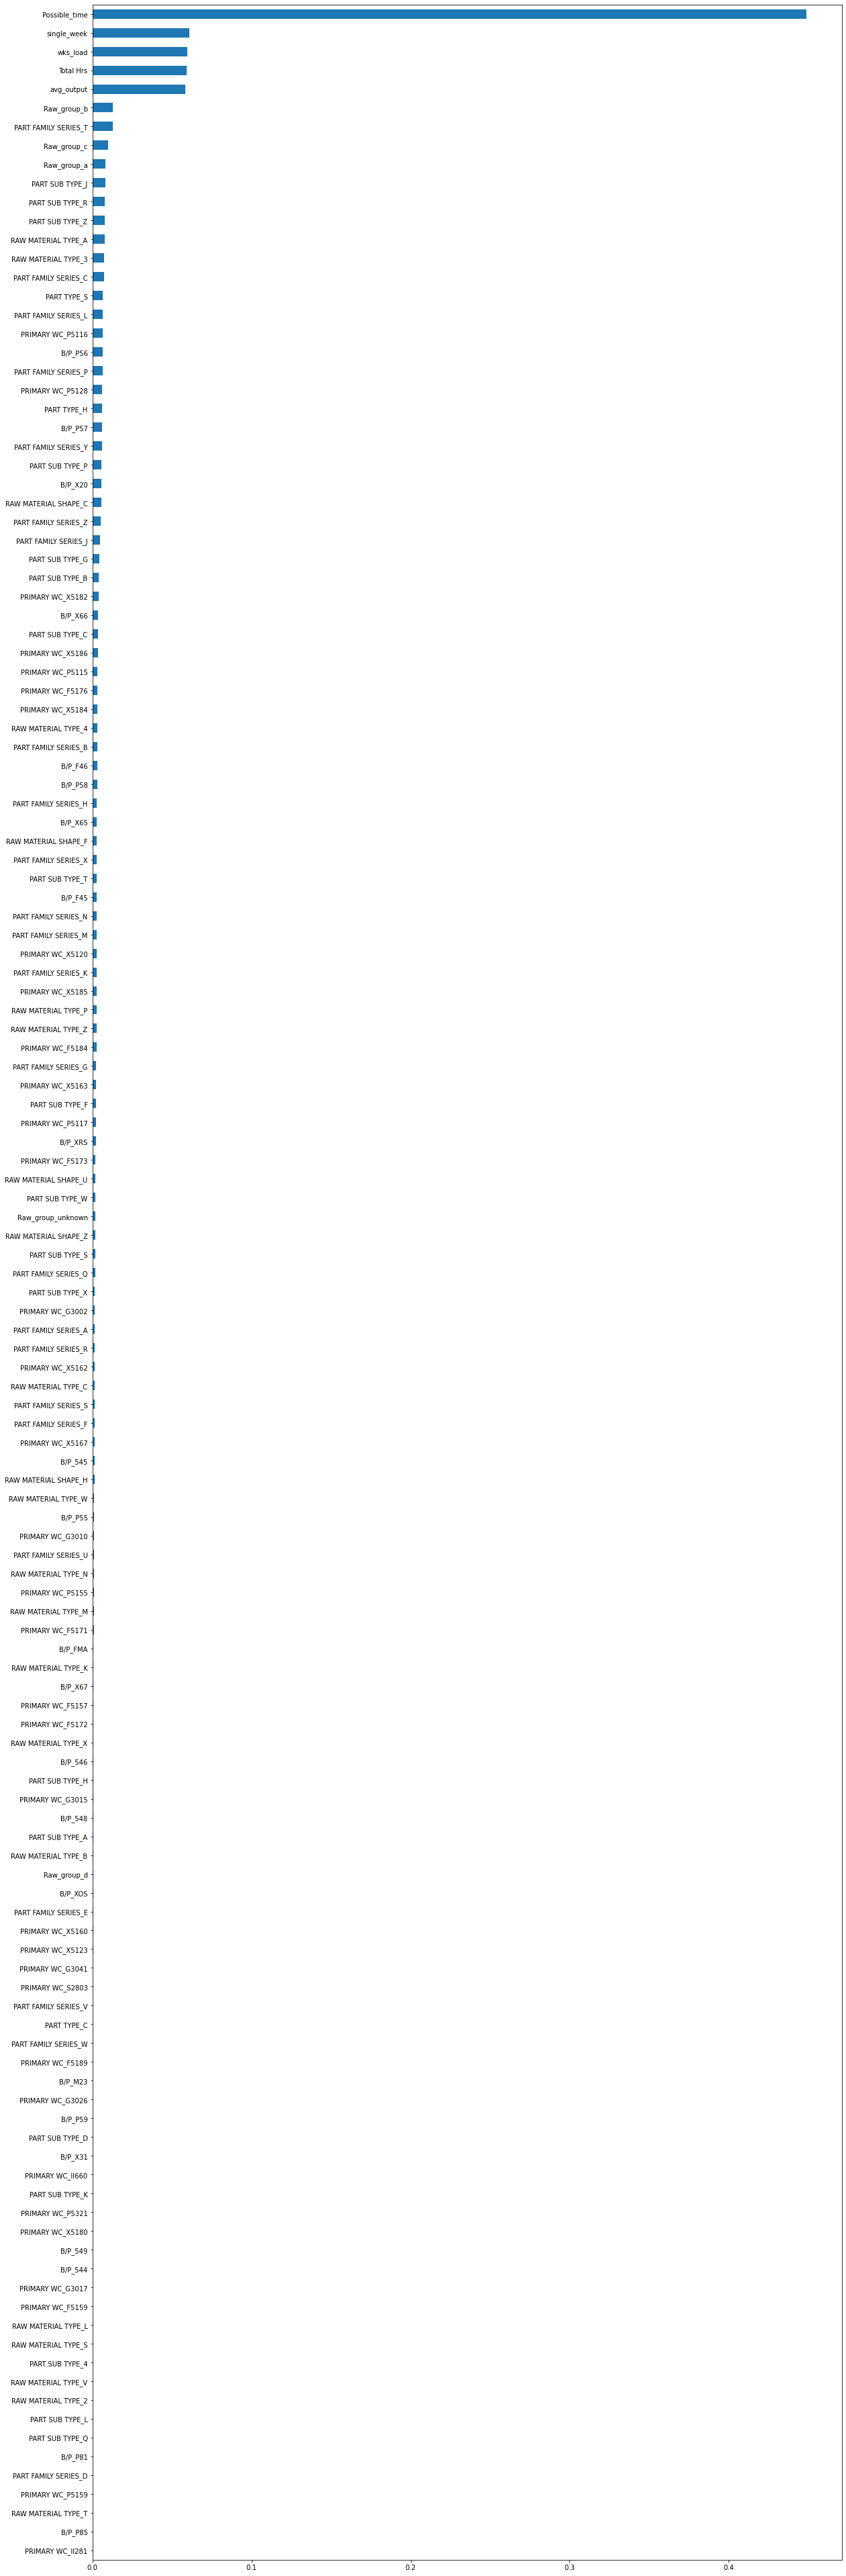

In [106]:
feature_importances = pd.Series(RF_model.feature_importances_, index=X_train_enc.columns)
sorted_features=feature_importances.sort_values()
#feature_importances.plot(kind='barh', figsize=(7,6))
sorted_features.plot(kind='barh', figsize=(20,70))

In [103]:
from sklearn.inspection import plot_partial_dependence

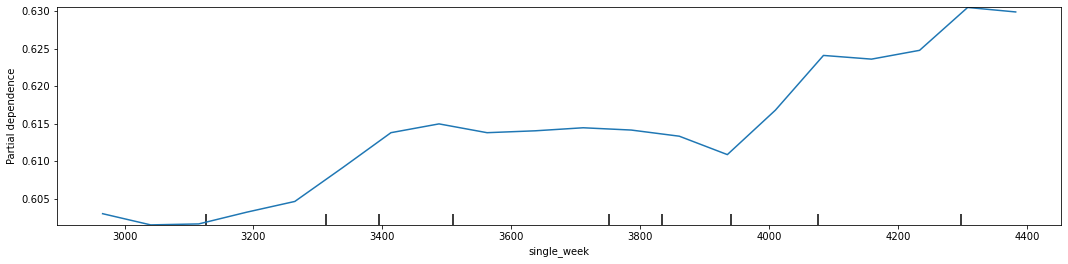

In [105]:
fig, ax = plt.subplots(figsize=(18,4))
plot_partial_dependence(RF_model, X_train_enc, ['single_week'], 
                        grid_resolution=20, ax=ax)

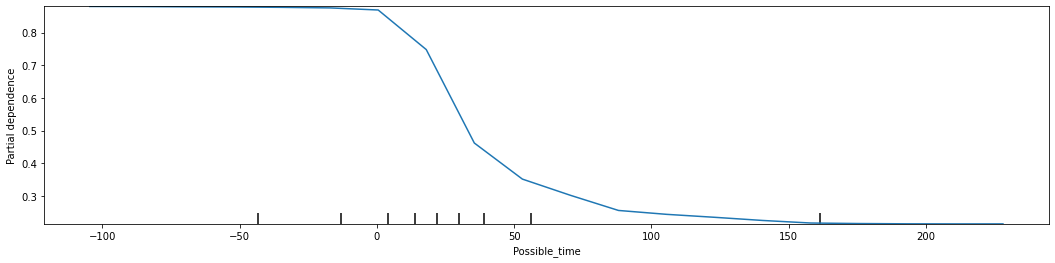

In [108]:
fig, ax = plt.subplots(figsize=(18,4))
plot_partial_dependence(RF_model, X_train_enc, ['Possible_time'], 
                        grid_resolution=20, ax=ax)

### Our results are scewed because so many orders are released after they are due.  I will run another model that does not have any orders released after due date.  anticipate accuracy to reduce significantly but we will then add first ring data and other important details

In [116]:
better_model = model_data[model_data['Possible_time'] >= 0] 

In [117]:
better_model

,B/P,PRIMARY WC,Possible_time,Total Hrs,single_week,avg_output,wks_load,Late,PART TYPE,PART SUB TYPE,PART FAMILY SERIES,RAW MATERIAL TYPE,RAW MATERIAL SHAPE,Raw_group
WO NBR,,,,,,,,,,,,,,
5150870,X66,X5163,113.0,9907.000,3406.000,2006.0,4.938684,0,S,R,P,3,C,b
5151400,X20,X5185,43.0,9907.000,3406.000,2006.0,4.938684,1,S,R,P,3,C,c
5151360,X66,X5184,207.0,9907.000,3406.000,2006.0,4.938684,0,S,P,L,A,C,a
5151430,F45,F5184,10.0,9907.000,3406.000,2006.0,4.938684,0,H,J,T,A,C,b
5151450,F45,F5184,10.0,9907.000,3406.000,2006.0,4.938684,0,H,J,T,A,C,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974530,P56,P5128,199.0,6228.258,2594.637,1964.0,3.171211,0,H,J,T,A,C,c
2984060,F45,F5173,9.0,6037.460,2528.574,2051.0,2.943667,0,H,G,Y,P,C,b
3003320,F46,F5176,5.0,6037.460,2528.574,2051.0,2.943667,1,H,G,Y,3,C,b


In [118]:
encoder = ce.OneHotEncoder(use_cat_names=True)

In [119]:
y=better_model['Late']

In [120]:
X=better_model.drop('Late', axis='columns')

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [122]:
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (3716, 13) (3716,)
Test (929, 13) (929,)


In [123]:
encoder.fit(X_train)
X_train_enc = encoder.transform(X_train)
X_test_enc = encoder.transform(X_test)

In [124]:
print(X_train_enc)

         B/P_X65  B/P_XRS  B/P_P55  B/P_P56  B/P_P57  B/P_X20  B/P_X66  \
WO NBR                                                                   
6744340        1        0        0        0        0        0        0   
1363720        0        1        0        0        0        0        0   
5452530        0        0        1        0        0        0        0   
6778280        0        0        0        1        0        0        0   
1553360        0        0        0        1        0        0        0   
...          ...      ...      ...      ...      ...      ...      ...   
1359810        0        0        0        0        0        0        0   
1234810        0        0        0        0        0        0        1   
5826300        0        0        0        1        0        0        0   
2181020        0        0        0        0        0        0        0   
5315720        0        0        0        0        0        0        0   

         B/P_F46  B/P_F45  B/P_P58  .

In [125]:
logmodel=LogisticRegression(solver='lbfgs', max_iter=9000)

In [126]:
logmodel.fit(X_train_enc, y_train)

LogisticRegression(max_iter=9000)

In [127]:
predictions=logmodel.predict(X_test_enc)

In [128]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.82      0.71      0.76       489\n           1       0.72      0.82      0.77       440\n\n    accuracy                           0.77       929\n   macro avg       0.77      0.77      0.77       929\nweighted avg       0.77      0.77      0.77       929\n'

In [129]:
confusion_matrix(y_test,predictions)

array([[349, 140],
       [ 77, 363]], dtype=int64)

In [130]:
accuracy_score(y_test,predictions)

0.7664155005382132

In [131]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [132]:
RF_model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

In [133]:
RF_model.fit(X_train_enc, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [134]:
predictions=RF_model.predict(X_test_enc)

In [135]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.80      0.78      0.79       489\n           1       0.76      0.79      0.77       440\n\n    accuracy                           0.78       929\n   macro avg       0.78      0.78      0.78       929\nweighted avg       0.78      0.78      0.78       929\n'

In [136]:
confusion_matrix(y_test,predictions)

array([[379, 110],
       [ 94, 346]], dtype=int64)

In [137]:
accuracy_score(y_test,predictions)

0.7804090419806243

In [138]:
importances = RF_model.feature_importances_

In [139]:
RF_model.feature_importances_

array([3.15960156e-03, 2.68801860e-03, 1.44884500e-03, 8.00378022e-03,
       5.99072948e-03, 6.36920482e-03, 4.07961747e-03, 4.02122707e-03,
       3.36763209e-03, 5.07609428e-03, 7.00497114e-04, 2.52210535e-04,
       8.93543672e-04, 1.01357637e-03, 3.17036893e-04, 9.18648885e-05,
       3.49664876e-04, 8.22655090e-04, 2.82157645e-04, 4.90698584e-04,
       2.78399737e-05, 3.60674574e-05, 2.00368684e-03, 1.07624568e-03,
       1.21242591e-03, 7.93858907e-03, 5.53697549e-03, 5.46939293e-03,
       4.03445863e-03, 4.54203845e-03, 1.76353614e-03, 2.45069436e-03,
       3.85200720e-03, 3.60625241e-03, 5.97846282e-04, 2.45378311e-03,
       5.80847387e-04, 2.81289030e-03, 3.27914501e-03, 1.98354765e-03,
       1.40259880e-03, 8.79617644e-04, 2.36249431e-03, 4.07567073e-04,
       7.03487582e-04, 2.11684300e-04, 1.33568091e-04, 9.31562022e-04,
       3.51086913e-04, 5.75091650e-04, 2.09352722e-04, 5.46706305e-04,
       4.75250309e-04, 8.28722205e-06, 1.45972781e-04, 7.71411803e-05,
      

<AxesSubplot:>

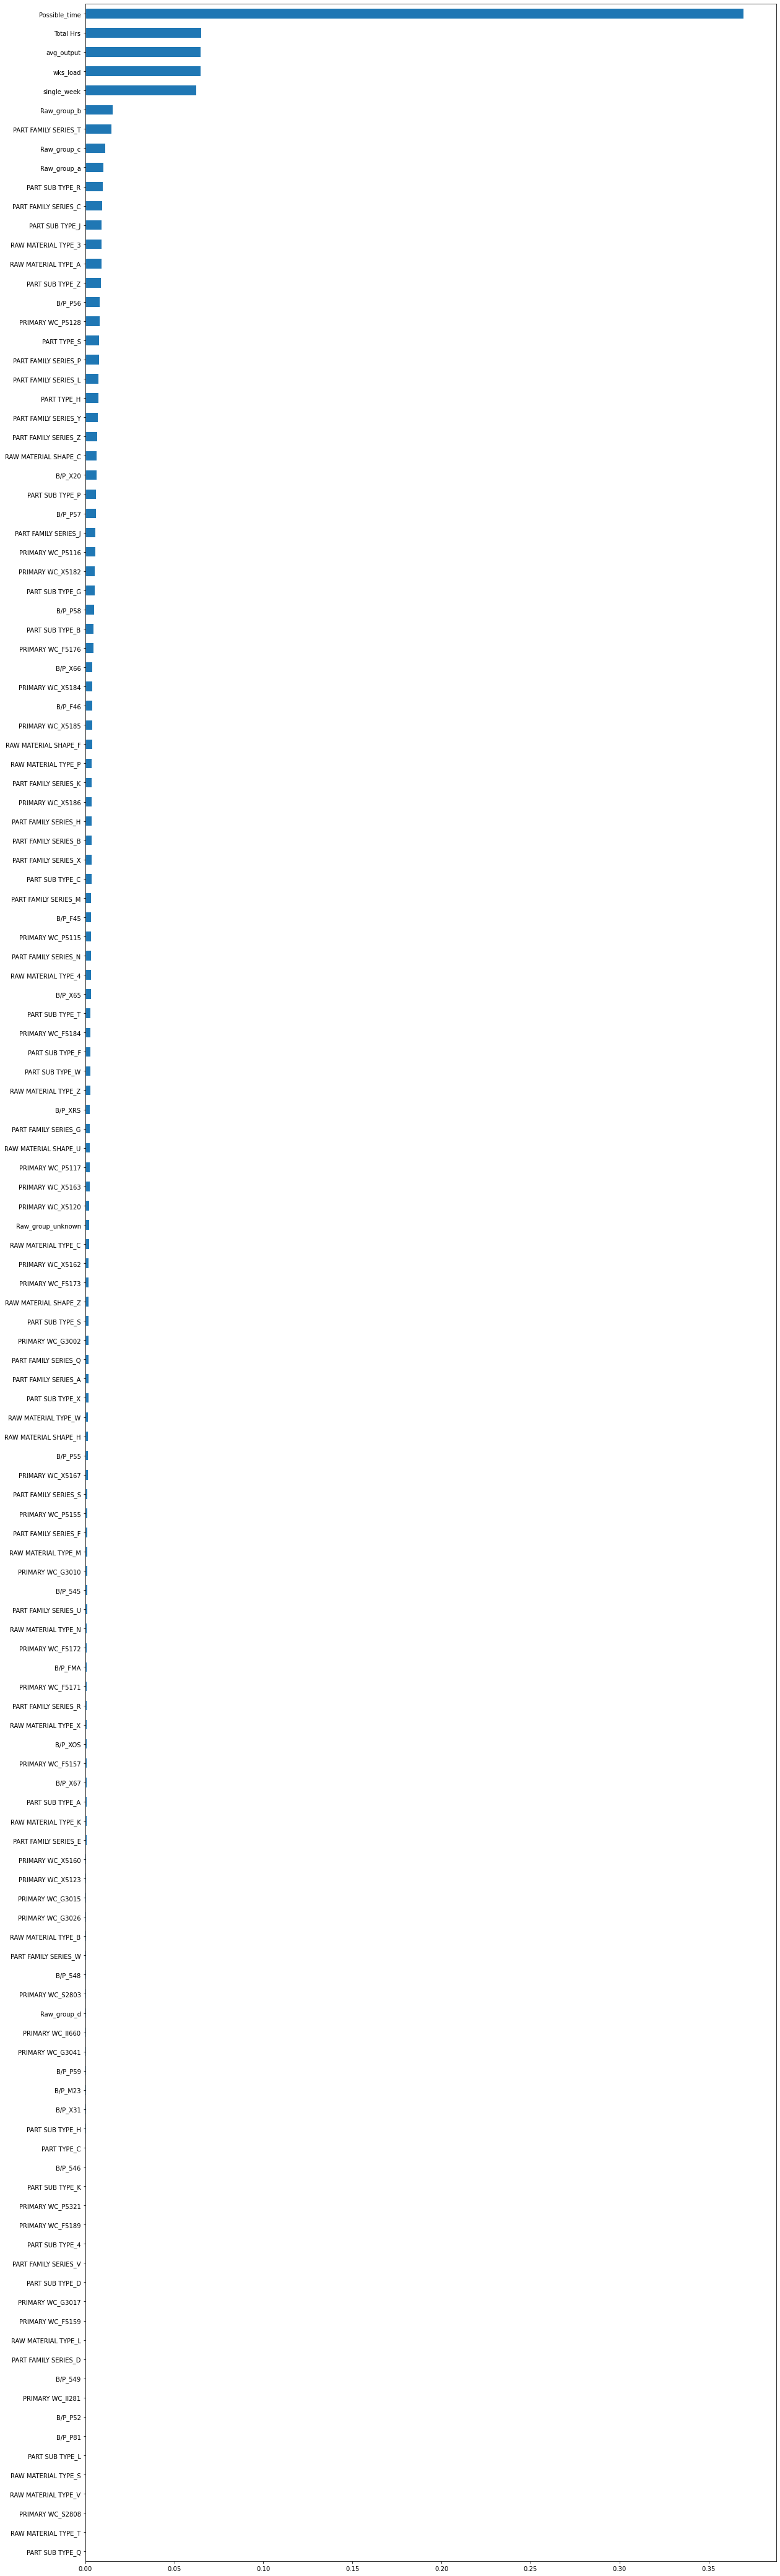

In [141]:
feature_importances = pd.Series(RF_model.feature_importances_, index=X_train_enc.columns)
sorted_features=feature_importances.sort_values()
#feature_importances.plot(kind='barh', figsize=(7,6))
sorted_features.plot(kind='barh', figsize=(20,76))

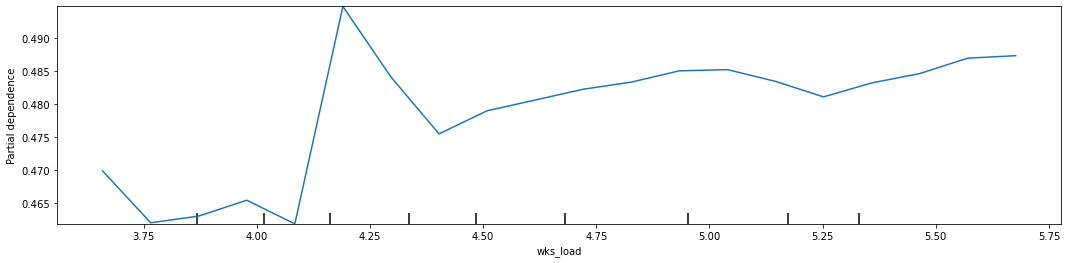

In [151]:
fig, ax = plt.subplots(figsize=(18,4))
plot_partial_dependence(RF_model, X_train_enc, ['wks_load'], 
                        grid_resolution=20, ax=ax)

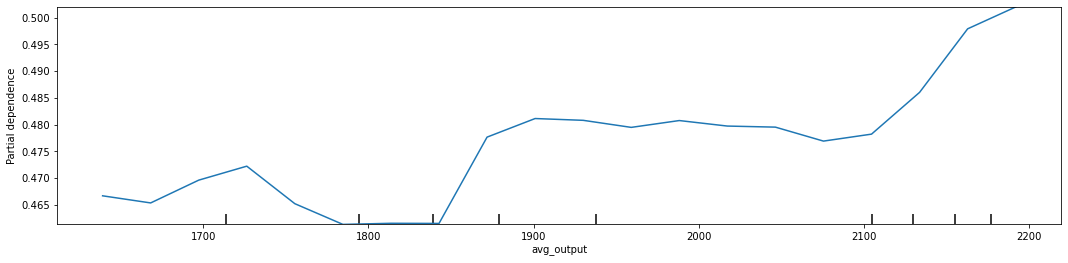

In [150]:
fig, ax = plt.subplots(figsize=(18,4))
plot_partial_dependence(RF_model, X_train_enc, ['avg_output'], 
                        grid_resolution=20, ax=ax)

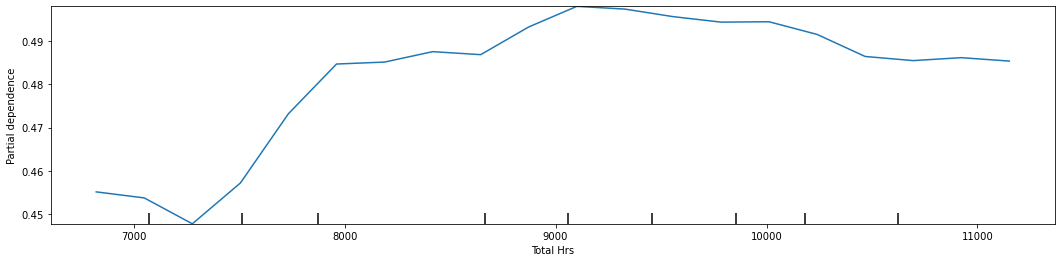

In [149]:
fig, ax = plt.subplots(figsize=(18,4))
plot_partial_dependence(RF_model, X_train_enc, ['Total Hrs'], 
                        grid_resolution=20, ax=ax)
                                                

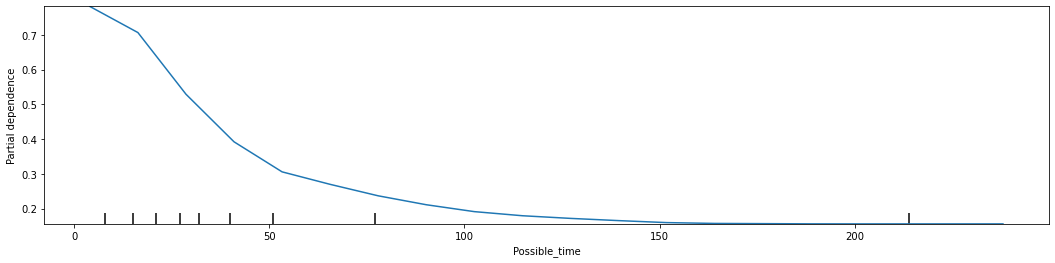

In [147]:
fig, ax = plt.subplots(figsize=(18,4))
plot_partial_dependence(RF_model, X_train_enc, ['Possible_time'], 
                        grid_resolution=20, ax=ax)
                                                

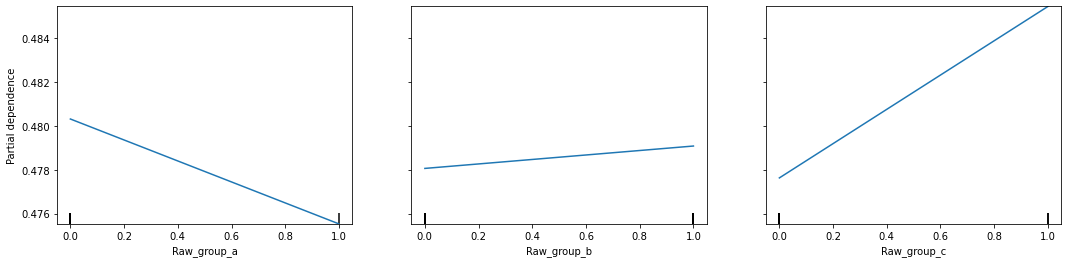

In [148]:
fig, ax = plt.subplots(figsize=(18,4))
plot_partial_dependence(RF_model, X_train_enc, ['Raw_group_a', "Raw_group_b", "Raw_group_c"], 
                        grid_resolution=20, ax=ax)

In [ ]:
## What to add:
    
## First ring operation - will give the opportunity to understand prime work order creation to first ring timeframe
## Part number lead time - will give the opportunity to highight lead time innacuracies and will definitely improve the accuracy of the model